In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [4]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv', header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [8]:
cabecalho = ['Idade','Gênero','IMC','Qtd Filhos','Fumante','Região','Encargos']
df.columns = cabecalho
df.head()

,Idade,Gênero,IMC,Qtd Filhos,Fumante,Região,Encargos
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [9]:
df.replace('?', np.nan, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Idade       2768 non-null   object 
 1   Gênero      2772 non-null   int64  
 2   IMC         2772 non-null   float64
 3   Qtd Filhos  2772 non-null   int64  
 4   Fumante     2765 non-null   object 
 5   Região      2772 non-null   int64  
 6   Encargos    2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [24]:
media_idade = df['Idade'].mean()
df['Idade'].fillna(media_idade, inplace=True)
df['Idade'] = df['Idade'].astype(int)
df['Idade'].dtypes

dtype('int32')

In [26]:
df['Fumante'].fillna(df['Fumante'].value_counts().idxmax(), inplace=True)
df['Fumante'] = df['Fumante'].astype(int)
df.dtypes

Idade           int32
Gênero          int64
IMC           float64
Qtd Filhos      int64
Fumante         int32
Região          int64
Encargos      float64
dtype: object

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Idade       2772 non-null   int32  
 1   Gênero      2772 non-null   int64  
 2   IMC         2772 non-null   float64
 3   Qtd Filhos  2772 non-null   int64  
 4   Fumante     2772 non-null   int32  
 5   Região      2772 non-null   int64  
 6   Encargos    2772 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.1 KB


In [28]:
df['Encargos'] = np.round(df['Encargos'], 2)
df.head()

,Idade,Gênero,IMC,Qtd Filhos,Fumante,Região,Encargos
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


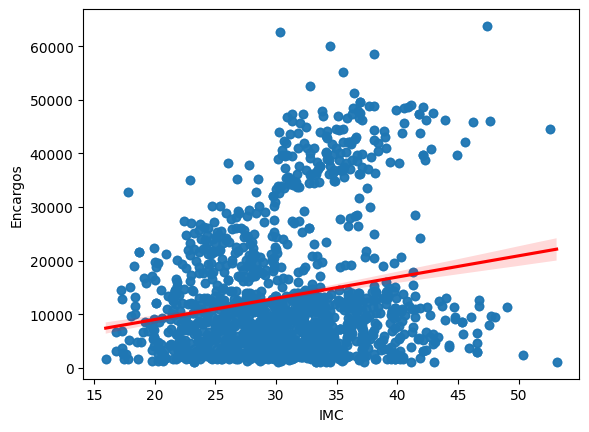

In [30]:
sns.regplot(x=df[['IMC']], y=df[['Encargos']], line_kws={"color": "red"})
plt.show()

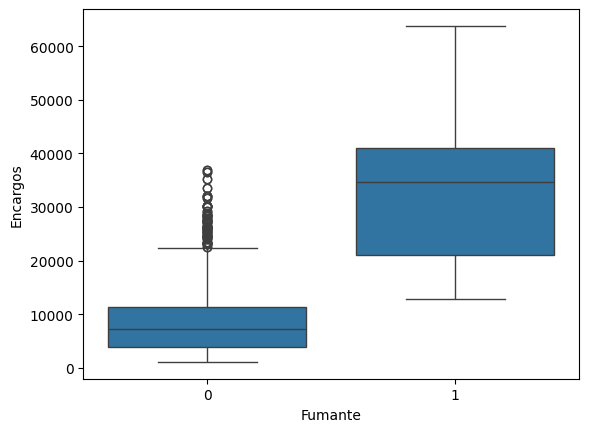

In [32]:
sns.boxplot(x='Fumante', y='Encargos', data=df)
plt.show()

In [33]:
df.corr()

,Idade,Gênero,IMC,Qtd Filhos,Fumante,Região,Encargos
Idade,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
Gênero,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
IMC,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
Qtd Filhos,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
Fumante,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
Região,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
Encargos,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


In [35]:
df.shape

(2772, 7)

In [53]:
y = df[['Encargos']]
x = df[['Fumante']]
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [45]:
lr.score(x_teste, y_teste)

0.6003937224160774

In [46]:
z = df[['Idade', 'Gênero', 'IMC', 'Qtd Filhos', 'Fumante', 'Região']]
lr.fit(z, y)
lr.score(z, y)

0.7504083820289634

In [52]:
input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)),('model', LinearRegression())]
pipe = Pipeline(input)
pipe.fit(z, y)
yhat = pipe.predict(z)
r2_score(y, yhat)

0.8452091092904718

In [54]:
x_treino, x_teste, y_treino, y_teste = train_test_split(z, y, test_size=0.2, random_state=1)

In [55]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_treino, y_treino)
val_preditos = RidgeModel.predict(x_teste)
r2_score(y_teste, val_preditos)

0.6760807731582401

In [57]:
pr = PolynomialFeatures(degree=2)
x_treino_pr = pr.fit_transform(x_treino)
x_teste_pr = pr.fit_transform(x_teste)
RidgeModel.fit(x_treino_pr, y_treino)
yhat = RidgeModel.predict(x_teste_pr)
r2_score(y_teste, yhat)

0.7835631107608165